In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2022-01-20"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2022_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-01-20,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5992,사하구,6675,사하구,683,11.4%,"6,334"
1,2022-01-20,간장,오복왕표 0.9ℓ 1병,6990,사하구,7500,사하구,510,7.3%,"7,245"
2,2022-01-20,갈치,60cm정도 500g 1마리(냉동),9800,사하구,9900,사하구,100,1.02%,"9,850"
3,2022-01-20,고등어,30㎝정도 500g 1마리,3809,사하구,4433,사하구,624,16.38%,"4,121"
4,2022-01-20,달걀,오경슈퍼란60g정도 10개,3590,사하구,3990,사하구,400,11.14%,"3,790"
5,2022-01-20,닭고기,육계 1.0㎏,5990,사하구,8980,사하구,2990,49.92%,"7,485"
6,2022-01-20,대파,1.0㎏,3557,사하구,4316,사하구,759,21.34%,"3,937"
7,2022-01-20,돼지고기,삼겹살 500g,11950,사하구,12400,사하구,450,3.77%,"12,175"
8,2022-01-20,두부,500g 판두부(국산포장두부 420g) 1모,5194,사하구,5515,사하구,321,6.18%,"5,355"
9,2022-01-20,라면,신라면 120g 1봉지,736,사하구,738,사하구,2,0.27%,737


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2022-04-21"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2022_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-04-21,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6742,사하구,7425,사하구,683,10.13%,"7,084"
1,2022-04-21,간장,오복왕표 0.9ℓ 1병,6990,사하구,7500,사하구,510,7.3%,"7,245"
2,2022-04-21,갈치,60cm정도 500g 1마리(냉동),11600,사하구,12900,사하구,1300,11.21%,"12,250"
3,2022-04-21,달걀,오경슈퍼란60g정도 10개,3590,사하구,3990,사하구,400,11.14%,"3,790"
4,2022-04-21,닭고기,육계 1.0㎏,6990,사하구,9980,사하구,2990,42.78%,"8,485"
5,2022-04-21,대파,1.0㎏,3112,사하구,4483,사하구,1371,44.06%,"3,798"
6,2022-04-21,돼지고기,삼겹살 500g,11450,사하구,12900,사하구,1450,12.66%,"12,175"
7,2022-04-21,두부,500g 판두부(국산포장두부 420g) 1모,5194,사하구,5515,사하구,321,6.18%,"5,355"
8,2022-04-21,라면,신라면 120g 1봉지,736,사하구,738,사하구,2,0.27%,737
9,2022-04-21,맥주,하이트 500㎖ 1병,1580,사하구,1580,사하구,0,0.0%,"1,580"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2022-07-21"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2022_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-07-21,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8175,사하구,8925,사하구,750,9.17%,"8,550"
1,2022-07-21,간장,오복왕표 0.9ℓ 1병,6590,사하구,6750,사하구,160,2.43%,"6,670"
2,2022-07-21,갈치,60cm정도 500g 1마리(냉동),9900,사하구,12900,사하구,3000,30.3%,"11,400"
3,2022-07-21,고등어,30㎝정도 500g 1마리,4422,사하구,5700,사하구,1278,28.9%,"5,061"
4,2022-07-21,달걀,오경슈퍼란60g정도 10개,3590,사하구,3990,사하구,400,11.14%,"3,790"
5,2022-07-21,닭고기,육계 1.0㎏,7990,사하구,10480,사하구,2490,31.16%,"9,235"
6,2022-07-21,대파,1.0㎏,3740,사하구,3983,사하구,243,6.5%,"3,862"
7,2022-07-21,돼지고기,삼겹살 500g,12450,사하구,13900,사하구,1450,11.65%,"13,175"
8,2022-07-21,두부,500g 판두부(국산포장두부 420g) 1모,5194,사하구,5515,사하구,321,6.18%,"5,355"
9,2022-07-21,라면,신라면 120g 1봉지,572,사하구,736,사하구,164,28.67%,654


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2022-10-20"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2022_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-10-20,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,사하구,8925,사하구,1500,20.2%,"8,175"
1,2022-10-20,간장,오복왕표 0.9ℓ 1병,6590,사하구,7063,사하구,473,7.18%,"6,827"
2,2022-10-20,갈치,60cm정도 500g 1마리(냉동),9900,사하구,12800,사하구,2900,29.29%,"11,350"
3,2022-10-20,달걀,오경슈퍼란60g정도 10개,3990,사하구,4290,사하구,300,7.52%,"4,140"
4,2022-10-20,닭고기,육계 1.0㎏,6990,사하구,10980,사하구,3990,57.08%,"8,985"
5,2022-10-20,대파,1.0㎏,3620,사하구,4983,사하구,1363,37.65%,"4,302"
6,2022-10-20,돼지고기,삼겹살 500g,10950,사하구,13400,사하구,2450,22.37%,"12,175"
7,2022-10-20,두부,500g 판두부(국산포장두부 420g) 1모,4498,사하구,5294,사하구,796,17.7%,"4,896"
8,2022-10-20,라면,신라면 120g 1봉지,680,사하구,820,사하구,140,20.59%,750
9,2022-10-20,맥주,하이트 500㎖ 1병,1580,사하구,1690,사하구,110,6.96%,"1,635"


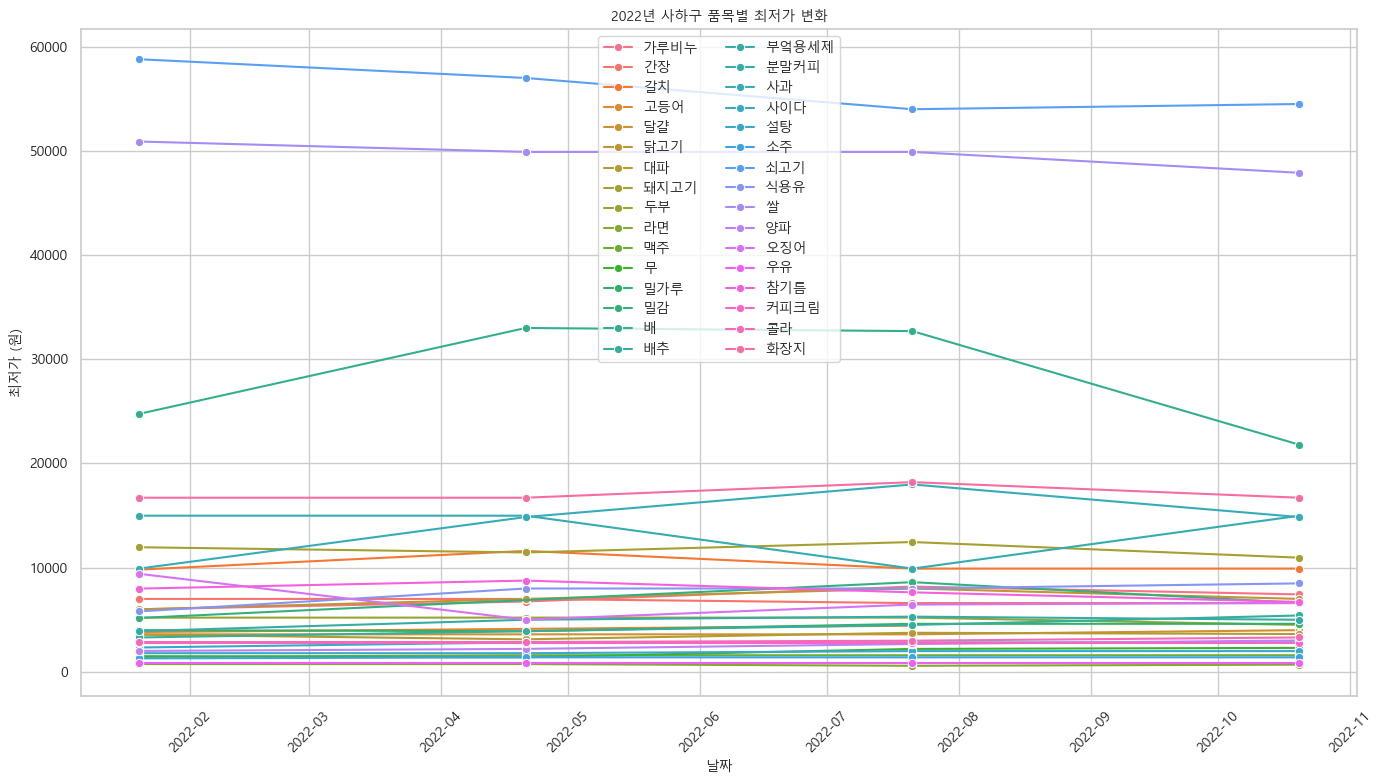

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사하구2022_1q.csv")
q2 = pd.read_csv("사하구2022_2q.csv")
q3 = pd.read_csv("사하구2022_3q.csv")
q4 = pd.read_csv("사하구2022_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2022년 사하구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("사하구2022_min.csv", index=False, encoding="utf-8-sig")

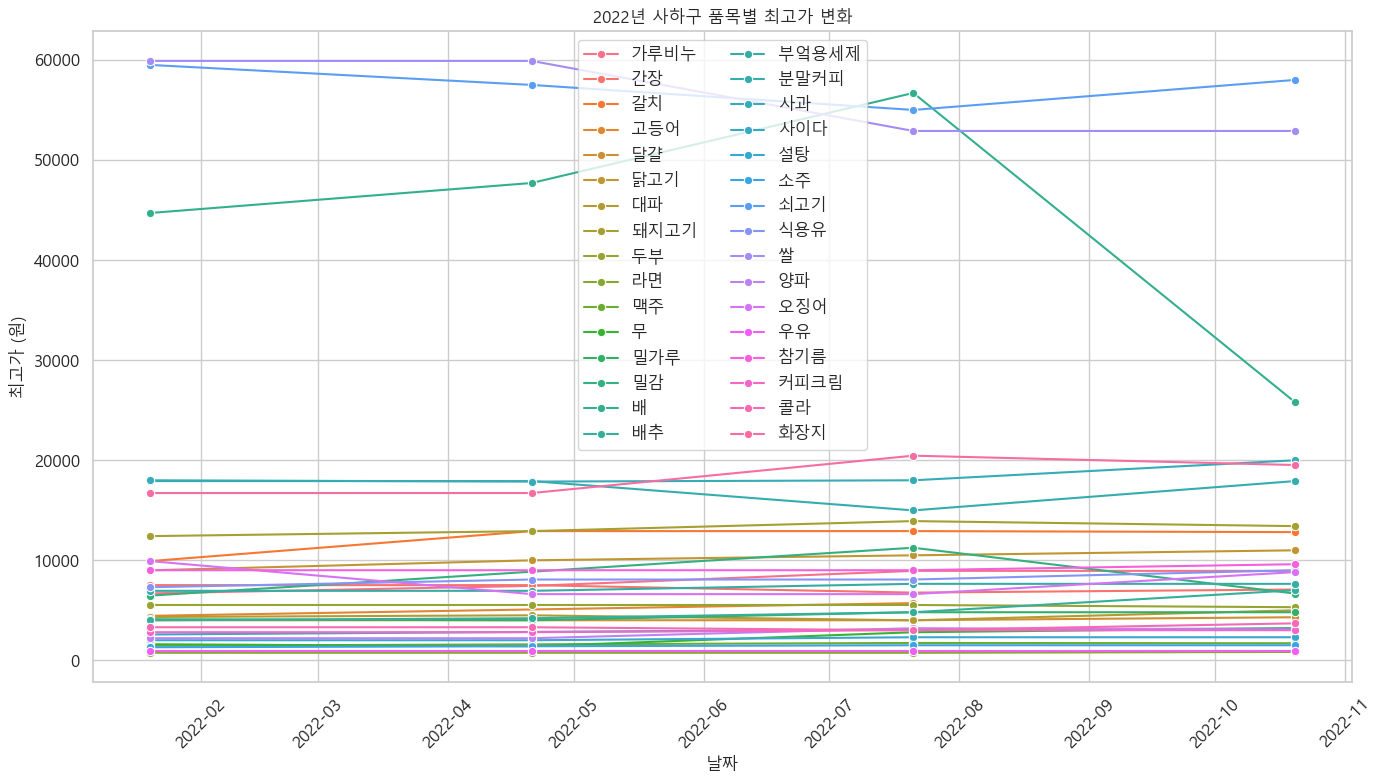

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사하구2022_1q.csv")
q2 = pd.read_csv("사하구2022_2q.csv")
q3 = pd.read_csv("사하구2022_3q.csv")
q4 = pd.read_csv("사하구2022_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2022년 사하구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("사하구2022_max.csv", index=False, encoding="utf-8-sig")